In [ ]:
import pandas as pd


## Load data


In [ ]:
ailments_data = pd.read_excel("ailments_arabic.xlsx", header=None)
ailments_data.rename(columns={0: "phrase", 1: "prompt"}, inplace=True)

In [ ]:
print("Missing values: ", ailments_data.isnull().sum())
ailments_data = ailments_data.drop_duplicates()


Missing values:  phrase    0
prompt    0
dtype: int64


In [ ]:
ailments_data.shape


(151, 2)

## EDA


In [ ]:
from collections import Counter

# Number of ailments
print("Number of categories: ", ailments_data["prompt"].nunique())

# Print class distribution
counter = Counter(ailments_data["prompt"])
for k, v in counter.items():
    per = v / len(ailments_data["prompt"]) * 100
    print("Class=%s, n=%d (%.3f%%)" % (k, v, per))

Number of categories:  7
Class=Allergy, n=21 (13.907%)
Class=Anemia, n=28 (18.543%)
Class=Bronchitis, n=16 (10.596%)
Class=Diarrhea, n=12 (7.947%)
Class=Fatigue, n=20 (13.245%)
Class=Flu, n=31 (20.530%)
Class=Stress, n=23 (15.232%)


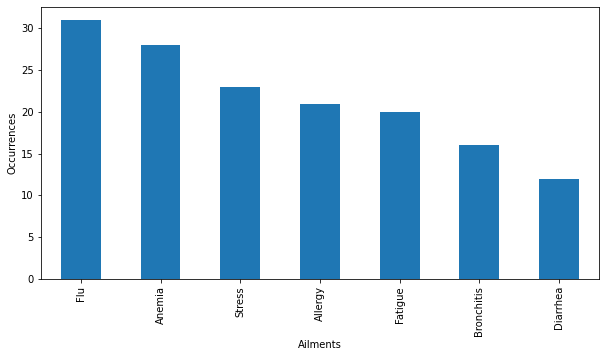

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
ailments_data["prompt"].value_counts().plot(kind="bar")
plt.xlabel("Ailments")
plt.ylabel("Occurrences")
plt.show()

In [ ]:
Flu = ailments_data.loc[ailments_data["prompt"] == "Flu"]
Diarrhea = ailments_data.loc[ailments_data["prompt"] == "Diarrhea"]

In [ ]:
ailments_data


,phrase,prompt
0,أنا أعاني من صعوبة في التنفس و التكلم و البلع,Allergy
1,أنا أعاني من القيء و الاسهال و ألم في المعدة,Allergy
2,لقد أغمي علي وانا أشعر بالتوتر لأن نبضات قلبي...,Allergy
3,أبدأ أن أعطس عندما أكون بجوار زهرة,Allergy
4,يصبح جلدي أحمر على اتصال مع الملح,Allergy
...,...,...
147,أنا قلق جدا,Stress
148,أريد أن أنام، أنا نعسان,Stress
149,الانزعاج والقلق التي احس بها من النوع الذي يظه...,Stress
150,أشعر بالحزن والاحباط,Stress


## Data augmentation


In [ ]:
X = ailments_data.iloc[:, 0]
y = ailments_data.iloc[:, 1]

In [ ]:
ailments_data
ailments_data["prompt"].value_counts()
# len(ailments_data.loc[ailments_data['prompt'] == 'Diarrhea'])

# columns=ailments_data['prompt'].unique()

Flu           31
Anemia        28
Stress        23
Allergy       21
Fatigue       20
Bronchitis    16
Diarrhea      12
Name: prompt, dtype: int64

In [ ]:
!pip install nlpaug


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from statistics import mode
import nlpaug.augmenter.char as nac
import nlpaug.augmenter.word as naw
import nlpaug.augmenter.sentence as nas

# print(mode(ailments_data['prompt']) ,' ',ailments_data['prompt'].value_counts()[0])
# symptoms=list(ailments_data['prompt'].unique())
max_count = ailments_data["prompt"].value_counts()[0]

aug_data = ailments_data

for ind in ailments_data.index:
    label = aug_data["prompt"][ind]
    texts = aug_data["phrase"][ind]
    name_count = len(aug_data.loc[aug_data["prompt"] == label])
    # print(name_count,' ',max_count)
    if name_count < max_count:
        # print(label)
        aug = naw.RandomWordAug(action="swap")

        if max_count - name_count > name_count:
            augmented_text = aug.augment(texts, n=2)
        else:
            augmented_text = aug.augment(texts, n=1)

        for string in augmented_text:
            aug_data = aug_data.append(
                {"phrase": string, "prompt": label}, ignore_index=True
            )


# manual oversample

In [ ]:
print(aug_data["prompt"].value_counts())
aug_data

Allergy       31
Anemia        31
Bronchitis    31
Fatigue       31
Flu           31
Stress        31
Diarrhea      26
Name: prompt, dtype: int64


,phrase,prompt
0,أنا أعاني من صعوبة في التنفس و التكلم و البلع,Allergy
1,أنا أعاني من القيء و الاسهال و ألم في المعدة,Allergy
2,لقد أغمي علي وانا أشعر بالتوتر لأن نبضات قلبي...,Allergy
3,أبدأ أن أعطس عندما أكون بجوار زهرة,Allergy
4,يصبح جلدي أحمر على اتصال مع الملح,Allergy
...,...,...
207,لدي في اضطرابات لاسباب النوم مختلفة,Stress
208,اضطرابات لدي نفسية: كالعصبية ، المفرط والغضب ا...,Stress
209,مشكلة لدي الشعر فقدان,Stress
210,لدي التركيز مشاكل,Stress


In [ ]:
aug_data


,phrase,prompt
0,أنا أعاني من صعوبة في التنفس و التكلم و البلع,Allergy
1,أنا أعاني من القيء و الاسهال و ألم في المعدة,Allergy
2,لقد أغمي علي وانا أشعر بالتوتر لأن نبضات قلبي...,Allergy
3,أبدأ أن أعطس عندما أكون بجوار زهرة,Allergy
4,يصبح جلدي أحمر على اتصال مع الملح,Allergy
...,...,...
207,لدي في اضطرابات لاسباب النوم مختلفة,Stress
208,اضطرابات لدي نفسية: كالعصبية ، المفرط والغضب ا...,Stress
209,مشكلة لدي الشعر فقدان,Stress
210,لدي التركيز مشاكل,Stress


In [ ]:
import nlpaug.augmenter.char as nac
import nlpaug.augmenter.word as naw
import nlpaug.augmenter.sentence as nas


def dataAugFun(ailments_data, N):
    """Increase the number of samples by data augmentation

    Args:
        ailments_data (DataFrame): contains the data
        N (int): number of samples to be generated

    Returns:
        DataFrame: data after augmentation
    """
    aug_data = ailments_data.head(0)

    texts = ailments_data["phrase"]
    for ind in ailments_data.index:
        texts = ailments_data["phrase"][ind]
        label = ailments_data["prompt"][ind]
        aug = naw.RandomWordAug(action="swap")
        augmented_text = aug.augment(texts, n=N)

        for string in augmented_text:
            aug_data = aug_data.append(
                {"phrase": string, "prompt": label}, ignore_index=True
            )

    return aug_data

In [ ]:
aug_datax2 = dataAugFun(aug_data, 2)

aug_datax2 = aug_datax2.drop_duplicates(subset=["phrase"])


aug_datax2.index = range(0, len(aug_datax2))

aug_datax2

,phrase,prompt
0,أنا أعاني صعوبة من في التنفس التكلم و و البلع,Allergy
1,أعاني أنا من صعوبة في التنفس و البلع التكلم و,Allergy
2,من أنا أعاني القيء الاسهال و و ألم في المعدة,Allergy
3,أنا أعاني القيء من و الاسهال و ألم في المعدة,Allergy
4,لقد أغمي علي وانا أشعر بالتوتر نبضات لأن قلبي ...,Allergy
...,...,...
369,اضطرابات لدي: نفسية ، كالعصبية المفرط والغضب ا...,Stress
370,لدي اضطرابات نفسية: المفرط كالعصبية ، والغضب ا...,Stress
371,مشكلة الشعر فقدان لدي,Stress
372,التركيز لدي مشاكل,Stress


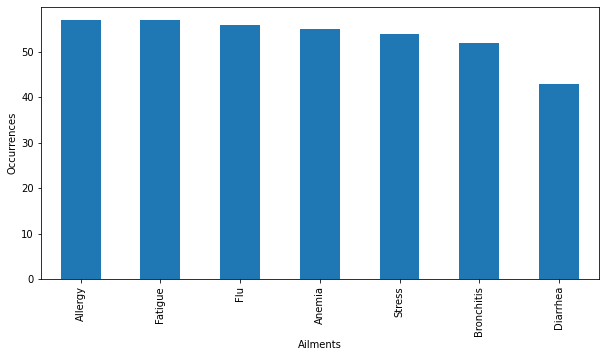

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
aug_datax2["prompt"].value_counts().plot(kind="bar")
plt.xlabel("Ailments")
plt.ylabel("Occurrences")
plt.show()

## Data preprocessing


In [ ]:
print(aug_datax2["prompt"].value_counts())
aug_datax2

Allergy       57
Fatigue       57
Flu           56
Anemia        55
Stress        54
Bronchitis    52
Diarrhea      43
Name: prompt, dtype: int64


,phrase,prompt
0,أنا أعاني صعوبة من في التنفس التكلم و و البلع,Allergy
1,أعاني أنا من صعوبة في التنفس و البلع التكلم و,Allergy
2,من أنا أعاني القيء الاسهال و و ألم في المعدة,Allergy
3,أنا أعاني القيء من و الاسهال و ألم في المعدة,Allergy
4,لقد أغمي علي وانا أشعر بالتوتر نبضات لأن قلبي ...,Allergy
...,...,...
369,اضطرابات لدي: نفسية ، كالعصبية المفرط والغضب ا...,Stress
370,لدي اضطرابات نفسية: المفرط كالعصبية ، والغضب ا...,Stress
371,مشكلة الشعر فقدان لدي,Stress
372,التركيز لدي مشاكل,Stress


In [ ]:
from sklearn import preprocessing
import numpy

# rename columns
DATA_COLUMN = "text"
LABEL_COLUMN = "label"
aug_datax2.rename(columns={0: "phrase", 1: "prompt"}, inplace=True)
aug_datax2.columns = [DATA_COLUMN, LABEL_COLUMN]

# Convert labels to numbers

le = preprocessing.LabelEncoder()
le.fit(aug_datax2[LABEL_COLUMN])

le.classes_


y = le.transform(aug_datax2[LABEL_COLUMN])
# print(le.inverse_transform(y))


# compare before and after
print(aug_datax2[LABEL_COLUMN].value_counts())
unique, counts = numpy.unique(y, return_counts=True)
afterEncoder = dict(zip(unique, counts))
dict(sorted(afterEncoder.items(), key=lambda item: item[1], reverse=True))

aug_datax2[LABEL_COLUMN] = y

Allergy       57
Fatigue       57
Flu           56
Anemia        55
Stress        54
Bronchitis    52
Diarrhea      43
Name: label, dtype: int64


In [ ]:
aug_datax2


,text,label
0,أنا أعاني صعوبة من في التنفس التكلم و و البلع,0
1,أعاني أنا من صعوبة في التنفس و البلع التكلم و,0
2,من أنا أعاني القيء الاسهال و و ألم في المعدة,0
3,أنا أعاني القيء من و الاسهال و ألم في المعدة,0
4,لقد أغمي علي وانا أشعر بالتوتر نبضات لأن قلبي ...,0
...,...,...
369,اضطرابات لدي: نفسية ، كالعصبية المفرط والغضب ا...,6
370,لدي اضطرابات نفسية: المفرط كالعصبية ، والغضب ا...,6
371,مشكلة الشعر فقدان لدي,6
372,التركيز لدي مشاكل,6


In [ ]:
import tensorflow as tf
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from numpy import array
import gensim
from gensim.models import KeyedVectors
from gensim.models import word2vec


## Model before lemmatization

In [ ]:
# prepare tokenizer

t = Tokenizer()
t.fit_on_texts(aug_datax2.iloc[:, 0])
vocab_size = len(t.word_index) + 1
# integer encode the documents

encoded_docs = t.texts_to_sequences(aug_datax2.iloc[:, 0])

print("encoded_docs:\n", max(encoded_docs))

max_length = 0

for doc in encoded_docs:
    if len(doc) > max_length:
        max_length = len(doc)


# pad documents to a max length of 4 words
padded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding="post")
print("padded_docs:\n", padded_docs)

encoded_docs:
 [418, 7, 419]
padded_docs:
 [[  3  17   9 ...   0   0   0]
 [ 17   3  10 ...   0   0   0]
 [ 10   3  17 ...   0   0   0]
 ...
 [370 120 186 ...   0   0   0]
 [ 28   1  30 ...   0   0   0]
 [ 10 223  17 ...   0   0   0]]


In [ ]:
import pandas as pd
import numpy as np

df = pd.DataFrame(padded_docs)
df["label"] = aug_datax2.iloc[:, 1]
df.iloc[:, : padded_docs.shape[1]]


df = df.dropna()

In [ ]:
LABEL_COLUMN = "label"
df[LABEL_COLUMN] = df[LABEL_COLUMN].astype("category")

df[LABEL_COLUMN] = df[LABEL_COLUMN].cat.codes
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,label
0,3,17,9,10,2,13,95,5,5,41,0,0,0,0,0,0,0,0
1,17,3,10,9,2,13,5,41,95,5,0,0,0,0,0,0,0,0
2,10,3,17,96,22,5,5,20,2,15,0,0,0,0,0,0,0,0
3,3,17,96,10,5,22,5,20,2,15,0,0,0,0,0,0,0,0
4,60,89,97,98,7,99,100,63,42,43,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
369,59,1,200,4,203,202,201,204,206,205,4,10,207,4,208,209,210,6
370,1,59,200,202,203,4,201,204,206,205,10,4,4,207,209,208,210,6
371,370,120,186,1,0,0,0,0,0,0,0,0,0,0,0,0,0,6
372,28,1,30,0,0,0,0,0,0,0,0,0,0,0,0,0,0,6


In [ ]:
from sklearn.model_selection import train_test_split

# xtrain,ytrain, test = train_test_split(df, test_size=0.2, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(
    df.iloc[:, : padded_docs.shape[1]], df["label"], test_size=0.15, random_state=42
)
# # all_datasets.append(data_Hard)

In [ ]:
X_train


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
3,3,17,96,10,5,22,5,20,2,15,0,0,0,0,0,0,0
352,173,84,55,172,174,175,5,2,2,56,0,0,0,0,0,0,0
77,7,129,11,4,125,75,126,14,0,0,0,0,0,0,0,0,0
132,29,1,15,4,22,5,0,0,0,0,0,0,0,0,0,0,0
311,1,9,143,10,13,4,144,2,8,145,146,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,405,25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
106,20,2,1,91,0,0,0,0,0,0,0,0,0,0,0,0,0
270,8,18,37,394,395,393,0,0,0,0,0,0,0,0,0,0,0
348,19,40,2,6,170,48,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report

clf = make_pipeline(StandardScaler(), SVC(kernel="rbf"))


clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()), ('svc', SVC())])

In [ ]:
def compute_accuracy(Y_true, Y_pred):
    correctly_predicted = 0
    # iterating over every label and checking it with the true sample
    for true_label, predicted in zip(Y_true, Y_pred):
        if true_label == predicted:
            correctly_predicted += 1
    # computing the accuracy score
    accuracy_score = correctly_predicted / len(Y_true)
    return accuracy_score

In [ ]:
Y_pred = clf.predict(X_test)
score_test = compute_accuracy(y_test, Y_pred)

In [ ]:
score_test


0.38596491228070173

In [ ]:
print(classification_report(y_test, Y_pred))

# Data Augmentation + model
# classification report on 15% test data
# Model SVM (without lemmatization)

              precision    recall  f1-score   support

           0       0.80      0.36      0.50        11
           1       0.43      0.33      0.38         9
           2       0.38      0.71      0.50         7
           3       0.27      0.57      0.36         7
           4       0.25      0.14      0.18         7
           5       0.30      0.43      0.35         7
           6       0.67      0.22      0.33         9

    accuracy                           0.39        57
   macro avg       0.44      0.40      0.37        57
weighted avg       0.47      0.39      0.38        57



In [ ]:
X_pred = clf.predict(X_train)
score_test = compute_accuracy(y_train, X_pred)

In [ ]:
print(classification_report(y_train, X_pred))  # table accuracy for test data

              precision    recall  f1-score   support

           0       0.45      0.46      0.45        46
           1       0.44      0.57      0.50        46
           2       0.56      0.44      0.49        45
           3       0.31      0.69      0.43        36
           4       0.66      0.54      0.59        50
           5       0.62      0.53      0.57        49
           6       0.92      0.24      0.39        45

    accuracy                           0.49       317
   macro avg       0.56      0.50      0.49       317
weighted avg       0.57      0.49      0.49       317



In [ ]:
score_test


0.4921135646687697

In [ ]:
print(classification_report(y_train, X_pred))

              precision    recall  f1-score   support

           0       0.45      0.46      0.45        46
           1       0.44      0.57      0.50        46
           2       0.56      0.44      0.49        45
           3       0.31      0.69      0.43        36
           4       0.66      0.54      0.59        50
           5       0.62      0.53      0.57        49
           6       0.92      0.24      0.39        45

    accuracy                           0.49       317
   macro avg       0.56      0.50      0.49       317
weighted avg       0.57      0.49      0.49       317



In [ ]:
from sklearn.naive_bayes import CategoricalNB

Cnb = CategoricalNB()
model = Cnb.fit(X_train, y_train)

Y_pred_NB = model.predict(X_test)


In [ ]:
score_test_NB = compute_accuracy(y_test, Y_pred_NB)

In [ ]:
score_test_NB


0.5964912280701754

In [ ]:
print(classification_report(y_test, Y_pred_NB))

# Data Augmentation + model
# classification report on 15% test data
# Model NB (without lemmatization)

              precision    recall  f1-score   support

           0       1.00      0.55      0.71        11
           1       1.00      0.33      0.50         9
           2       0.86      0.86      0.86         7
           3       1.00      0.29      0.44         7
           4       0.57      0.57      0.57         7
           5       0.28      1.00      0.44         7
           6       0.86      0.67      0.75         9

    accuracy                           0.60        57
   macro avg       0.80      0.61      0.61        57
weighted avg       0.82      0.60      0.62        57



0.8322368421052632

## Lemmatization and model

In [ ]:
!pip install qalsadi


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 256 kB 15.4 MB/s 
     |████████████████████████████████| 138 kB 60.4 MB/s 
     |████████████████████████████████| 332 kB 78.3 MB/s 
     |████████████████████████████████| 251 kB 75.9 MB/s 
     |████████████████████████████████| 9.2 MB 44.7 MB/s 
     |████████████████████████████████| 51 kB 567 kB/s 
     |████████████████████████████████| 126 kB 65.8 MB/s 
     |████████████████████████████████| 353 kB 53.3 MB/s 
  Created wheel for pickledb: filename=pickleDB-0.9.2-py3-none-any.whl size=4269 sha256=3eeabd2981c6526ee3c5ce22663bf7e8ded86c292f167231763708b576f23ff7
  Stored in directory: /root/.cache/pip/wheels/88/91/d4/ef2e6a46ad2bc41f9cfad35fa2db5b34357a5e4da67c385ffa
Successfully built pickledb


In [ ]:
import string
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
import nltk
import qalsadi.lemmatizer
%pip install nltk
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')


def text_transform(message):

    # (a) change the message to lowercase
    message = message.lower()

    # (b) tokenize the message,
    # i.e. if input = 'i am a student.'
    # then, output  = ['i', 'am', 'a', 'student', '.']
    message = nltk.word_tokenize(message)

    # (c) remove special characters in the message
    msg_temp = []
    for word in message:
        # only accpet the alpha-numeric words and remove all other cases e.g. special characters
        if word.isalnum():
            msg_temp.append(word)

    message = msg_temp

    # (d) remove stopwords and punctuations
    msg_temp = []
    for word in message:
        if word not in stopwords.words('arabic') and word not in string.punctuation:
            msg_temp.append(word)

    message = msg_temp

    # (e) lemmatization function
    lemmer = qalsadi.lemmatizer.Lemmatizer()
    msg_temp = []
    for word in message:
        msg_temp.append(lemmer.lemmatize(word))

    # join all words with space and return new message
    new_message = " ".join(msg_temp)

    return new_message


aug_datax2
# apply the pre-processing steps via text_transform() function on text data
aug_datax2['transformed_phrase'] = aug_datax2[DATA_COLUMN].apply(
    text_transform)

X = aug_datax2.transformed_phrase
X.tail()


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


369    اضطراب لد نفس عصب مفرط غضب غير نوبة عاد قلق مخ...
370    لد اضطراب نفس مفرط عصب غضب غير نوبة عاد قلق مف...
371                                       مشكل شعر قد لد
372                                       تركيز لد مشاكل
373                                             أرق عانة
Name: transformed_phrase, dtype: object

In [ ]:
aug_datax2


,text,label,transformed_phrase
0,أنا أعاني صعوبة من في التنفس التكلم و و البلع,0,عانة صعوبة تنفس تكلم بلع
1,أعاني أنا من صعوبة في التنفس و البلع التكلم و,0,عانة صعوبة تنفس بلع تكلم
2,من أنا أعاني القيء الاسهال و و ألم في المعدة,0,عانة قيء الاسهال لم معد
3,أنا أعاني القيء من و الاسهال و ألم في المعدة,0,عانة قيء الاسهال لم معد
4,لقد أغمي علي وانا أشعر بالتوتر نبضات لأن قلبي ...,0,قد غمة علي وانا شعر توتر نبض أن قلب سريع
...,...,...,...
369,اضطرابات لدي: نفسية ، كالعصبية المفرط والغضب ا...,6,اضطراب لد نفس عصب مفرط غضب غير نوبة عاد قلق مخ...
370,لدي اضطرابات نفسية: المفرط كالعصبية ، والغضب ا...,6,لد اضطراب نفس مفرط عصب غضب غير نوبة عاد قلق مف...
371,مشكلة الشعر فقدان لدي,6,مشكل شعر قد لد
372,التركيز لدي مشاكل,6,تركيز لد مشاكل


In [ ]:
sum(aug_datax2.transformed_phrase.duplicated())

48

In [ ]:
aug_datax2 = aug_datax2.drop_duplicates(subset=["transformed_phrase"])

In [ ]:
print(aug_datax2["label"].value_counts())
aug_datax2

5    53
1    52
4    49
6    48
0    46
2    46
3    32
Name: label, dtype: int64


,text,label,transformed_phrase
0,أنا أعاني صعوبة من في التنفس التكلم و و البلع,0,عانة صعوبة تنفس تكلم بلع
1,أعاني أنا من صعوبة في التنفس و البلع التكلم و,0,عانة صعوبة تنفس بلع تكلم
2,من أنا أعاني القيء الاسهال و و ألم في المعدة,0,عانة قيء الاسهال لم معد
4,لقد أغمي علي وانا أشعر بالتوتر نبضات لأن قلبي ...,0,قد غمة علي وانا شعر توتر نبض أن قلب سريع
5,أغمي علي لقد وانا أشعر بالتوتر لأن قلبي نبضات ...,0,غمة علي قد وانا شعر توتر أن قلب نبض سريع
...,...,...,...
369,اضطرابات لدي: نفسية ، كالعصبية المفرط والغضب ا...,6,اضطراب لد نفس عصب مفرط غضب غير نوبة عاد قلق مخ...
370,لدي اضطرابات نفسية: المفرط كالعصبية ، والغضب ا...,6,لد اضطراب نفس مفرط عصب غضب غير نوبة عاد قلق مف...
371,مشكلة الشعر فقدان لدي,6,مشكل شعر قد لد
372,التركيز لدي مشاكل,6,تركيز لد مشاكل


In [ ]:
aug_datax2.index = range(0, len(aug_datax2))

In [ ]:
aug_datax2


,text,label,transformed_phrase
0,أنا أعاني صعوبة من في التنفس التكلم و و البلع,0,عانة صعوبة تنفس تكلم بلع
1,أعاني أنا من صعوبة في التنفس و البلع التكلم و,0,عانة صعوبة تنفس بلع تكلم
2,من أنا أعاني القيء الاسهال و و ألم في المعدة,0,عانة قيء الاسهال لم معد
3,لقد أغمي علي وانا أشعر بالتوتر نبضات لأن قلبي ...,0,قد غمة علي وانا شعر توتر نبض أن قلب سريع
4,أغمي علي لقد وانا أشعر بالتوتر لأن قلبي نبضات ...,0,غمة علي قد وانا شعر توتر أن قلب نبض سريع
...,...,...,...
321,اضطرابات لدي: نفسية ، كالعصبية المفرط والغضب ا...,6,اضطراب لد نفس عصب مفرط غضب غير نوبة عاد قلق مخ...
322,لدي اضطرابات نفسية: المفرط كالعصبية ، والغضب ا...,6,لد اضطراب نفس مفرط عصب غضب غير نوبة عاد قلق مف...
323,مشكلة الشعر فقدان لدي,6,مشكل شعر قد لد
324,التركيز لدي مشاكل,6,تركيز لد مشاكل


# vectorize

In [ ]:
import tensorflow as tf
from keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from numpy import array
import gensim
from gensim.models import KeyedVectors
from gensim.models import word2vec


In [ ]:
from tensorflow.keras.preprocessing.text import text_to_word_sequence


def get_max_input_length(docs):
    max_input_length = 1
    for document in docs:
        words = text_to_word_sequence(document)
        document_length = len(words)
        if document_length > max_input_length:
            max_input_length = document_length

    return max_input_length

In [ ]:
# prepare tokenizer

t = Tokenizer()
t.fit_on_texts(aug_datax2["transformed_phrase"])
vocab_size = len(t.word_index) + 1
# integer encode the documents
encoded_docs = t.texts_to_sequences(aug_datax2["transformed_phrase"])


print("encoded_docs:\n", max(encoded_docs))

max_length = 0

for doc in encoded_docs:
    if len(doc) > max_length:
        max_length = len(doc)


# pad documents to a max length of 4 words
padded_docs = pad_sequences(encoded_docs, maxlen=max_length, padding="post")
print("padded_docs:\n", padded_docs)

encoded_docs:
 [306, 2, 307]
padded_docs:
 [[ 21   3   5 ...   0   0   0]
 [ 21   3   5 ...   0   0   0]
 [ 21  57  50 ...   0   0   0]
 ...
 [275   2  16 ...   0   0   0]
 [ 25   1  20 ...   0   0   0]
 [276  21   0 ...   0   0   0]]


In [ ]:
padded_docs.shape[1]


13

In [ ]:
import pandas as pd
import numpy as np

df = pd.DataFrame(padded_docs)
df["label"] = aug_datax2[LABEL_COLUMN]
df.iloc[:, : padded_docs.shape[1]]


df = df.dropna()

In [ ]:
df


,0,1,2,3,4,5,6,7,8,9,10,11,12,label
0,21,3,5,88,79,0,0,0,0,0,0,0,0,0
1,21,3,5,79,88,0,0,0,0,0,0,0,0,0
2,21,57,50,15,7,0,0,0,0,0,0,0,0,0
3,16,80,89,90,2,91,92,58,11,27,0,0,0,0
4,80,89,16,90,2,91,58,11,92,27,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
321,47,1,78,151,48,34,152,153,76,49,154,48,155,6
322,1,47,78,48,151,34,152,153,76,49,48,154,155,6
323,275,2,16,1,0,0,0,0,0,0,0,0,0,6
324,25,1,20,0,0,0,0,0,0,0,0,0,0,6


# data split


In [ ]:
df.iloc[:, : padded_docs.shape[1]]

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,21,3,5,88,79,0,0,0,0,0,0,0,0
1,21,3,5,79,88,0,0,0,0,0,0,0,0
2,21,57,50,15,7,0,0,0,0,0,0,0,0
3,16,80,89,90,2,91,92,58,11,27,0,0,0
4,80,89,16,90,2,91,58,11,92,27,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
321,47,1,78,151,48,34,152,153,76,49,154,48,155
322,1,47,78,48,151,34,152,153,76,49,48,154,155
323,275,2,16,1,0,0,0,0,0,0,0,0,0
324,25,1,20,0,0,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split

# xtrain,ytrain, test = train_test_split(df, test_size=0.2, random_state=42)

X_train, X_test, y_train, y_test = train_test_split(
    df.iloc[:, : padded_docs.shape[1]], df["label"], test_size=0.15, random_state=42
)
# # all_datasets.append(data_Hard)

# New Section

In [ ]:
y_train = y_train.astype("category")

In [ ]:
# y_train=y_train.dropna()
y_train.isna().sum()
# y_train

# y_train=y_train.dropna()
# X_train.isna().sum()
# y_train

0

In [ ]:
import numpy as np
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC

clf = make_pipeline(StandardScaler(), SVC(gamma="auto"))
clf.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('svc', SVC(gamma='auto'))])

In [ ]:
def compute_accuracy(Y_true, Y_pred):
    correctly_predicted = 0
    # iterating over every label and checking it with the true sample
    for true_label, predicted in zip(Y_true, Y_pred):
        if true_label == predicted:
            correctly_predicted += 1
    # computing the accuracy score
    accuracy_score = correctly_predicted / len(Y_true)
    return accuracy_score

In [ ]:
Y_pred = clf.predict(X_test)
score = compute_accuracy(y_test, Y_pred)

In [ ]:
score


0.2653061224489796

In [ ]:
print(classification_report(y_test, Y_pred))

# Data Augmentation + model
# classification report on 15% test data
# Model SVM (Aug + lemmatization)

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.00      0.00      0.00         7
           2       0.23      0.43      0.30         7
           3       0.00      0.00      0.00         5
           4       0.50      0.29      0.36         7
           5       0.43      0.30      0.35        10
           6       0.31      0.83      0.45         6

    accuracy                           0.27        49
   macro avg       0.21      0.26      0.21        49
weighted avg       0.23      0.27      0.22        49



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
Y_pred = clf.predict(X_train)
score = compute_accuracy(y_train, Y_pred)

In [ ]:
score


0.42066420664206644

In [ ]:
from sklearn.naive_bayes import CategoricalNB

Cnb = CategoricalNB()
Y_pred_NB = Cnb.fit(X_train, y_train).predict(X_test)

In [ ]:
score_test = compute_accuracy(y_test, Y_pred_NB)

In [ ]:
score_test


0.5714285714285714

In [ ]:
print(classification_report(y_test, Y_pred_NB))

# Data Augmentation + lemmatization + model
# classification report on 15% test data
# Model NB (Aug + lemmatization)

              precision    recall  f1-score   support

           0       1.00      0.14      0.25         7
           1       0.40      0.86      0.55         7
           2       0.80      0.57      0.67         7
           3       0.00      0.00      0.00         5
           4       1.00      0.86      0.92         7
           5       0.46      0.60      0.52        10
           6       0.56      0.83      0.67         6

    accuracy                           0.57        49
   macro avg       0.60      0.55      0.51        49
weighted avg       0.62      0.57      0.53        49



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
from sklearn.naive_bayes import CategoricalNB

Cnb = CategoricalNB()
Y_pred_NB = Cnb.fit(X_train, y_train).predict(X_test)

In [ ]:
score_test = compute_accuracy(y_test, Y_pred_NB)

In [ ]:
score_test


0.4375

In [ ]:
print(classification_report(y_test, Y_pred_NB))

              precision    recall  f1-score   support

           0       1.00      0.57      0.73         7
           1       0.22      1.00      0.36         6
           2       0.20      0.20      0.20         5
           3       0.00      0.00      0.00         5
           4       1.00      0.50      0.67         6
           5       0.71      0.33      0.45        15
           6       1.00      0.50      0.67         4

    accuracy                           0.44        48
   macro avg       0.59      0.44      0.44        48
weighted avg       0.63      0.44      0.45        48



/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
